# Re-grouping streaming text files + Cleaning

## Import 

In [1]:
from bs4 import BeautifulSoup
import re
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import os

## Path

In [2]:
stream_path = "tweets/"
stream_files = [os.path.join(stream_path, f) for f in os.listdir(stream_path)]
print stream_files

['tweets/stream_2016_11_09_10-29-31.txt', 'tweets/stream_2016_11_10_11-46-55.txt', 'tweets/stream_2016_11_11_10-26-28.txt', 'tweets/stream_2016_11_11_10-34-00.txt', 'tweets/stream_2016_11_11_11-31-24.txt', 'tweets/stream_2016_11_11_11-35-57.txt', 'tweets/stream_2016_11_11_13-45-51.txt', 'tweets/stream_2016_11_11_14-51-58.txt', 'tweets/stream_2016_11_11_16-09-11.txt', 'tweets/stream_2016_11_11_18-21-15.txt', 'tweets/stream_2016_11_11_19-15-32.txt', 'tweets/stream_2016_11_11_20-12-24.txt', 'tweets/stream_2016_11_11_20-54-02.txt', 'tweets/stream_2016_11_11_22-41-26.txt', 'tweets/stream_2016_11_12_11-00-40.txt', 'tweets/stream_2016_11_12_12-08-17.txt', 'tweets/stream_2016_11_12_12-59-52.txt', 'tweets/stream_2016_11_12_13-30-37.txt', 'tweets/stream_2016_11_12_14-02-07.txt', 'tweets/stream_2016_11_12_14-35-21.txt', 'tweets/stream_2016_11_12_15-16-45.txt', 'tweets/stream_2016_11_12_15-26-27.txt', 'tweets/stream_2016_11_12_16-30-18.txt', 'tweets/stream_2016_11_12_16-35-11.txt', 'tweets/stream_

In [3]:
ACCEPTED_CHARACTERS = ['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j', 'k', 
                       'l', 'm', 'n', 'o', 'p', 'q', 'r', 's', 't', 'u', 'v', 'w', 'x', 'y', 'z'] + \
['%d'%i for i in range(10)] + \
['/', '@', '#', '&', '\x98', '\x92', '\xf0', '\x9f', '\x80', '\xa6', '\xe2'] + \
['\n', ' ', '!', '"', "'", '(', ')', '*', ',', '-', '.', ':', ';', '?', '_']

ACCEPTED_CHARACTERS.sort()

print len(ACCEPTED_CHARACTERS), "accepted characters"

62 accepted characters


In [4]:
print ACCEPTED_CHARACTERS

['\n', ' ', '!', '"', '#', '&', "'", '(', ')', '*', ',', '-', '.', '/', '0', '1', '2', '3', '4', '5', '6', '7', '8', '9', ':', ';', '?', '@', '_', 'a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j', 'k', 'l', 'm', 'n', 'o', 'p', 'q', 'r', 's', 't', 'u', 'v', 'w', 'x', 'y', 'z', '\x80', '\x92', '\x98', '\x9f', '\xa6', '\xe2', '\xf0']


## Custom functions

In [5]:
def open_and_read(f):
    with open(f, "r") as f:
        lines = f.readlines()
    header = lines[0:3]
    tweets = lines[3:]
    return header, tweets

In [6]:
def extract_next_tweet(indice, tweets):
    tweet = tweets[indice]
    indice += 1
    count = 0
    while tweet.find("<end>") < 0 and count < 100:
        tweet += tweets[indice]
        indice += 1
        count += 1
    return tweet, indice

def tweet_cleaning(tweet, accepted_caracters=[]):
    # Removing the 'start', 'end' markers
    t = tweet.replace("<start>", "")
    t = t.replace("<end>\n", "")
    t = t.replace("text:", "")
    # Lowercase 
    t = t.lower()
    # Reject tweet with non-accepted characters
    if accepted_caracters:
        if set(list(t.lower())).issubset(set(accepted_caracters)): # No need to clean
            return t 
        else:
            return None
            #for char in t:
            #    if char not in accepted_caracters:
            #        t = t.replace(char, "")
            # Removing multiple spaces
            #t = re.sub(' +',' ', t)
    #return t

# Test 

### Open a stream file

In [7]:
header, tweets = open_and_read(stream_files[2])
print "HEADER :\n", header
print "TWEETS :\n", tweets[0:4]

HEADER :
['Description: \n', "Queries: ['a', 'c', 'b', 'e', 'd', 'g', 'f', 'i', 'h', 'k', 'j', 'm', 'l', 'o', 'n', 'q', 'p', 's', 'r', 'u', 't', 'w', 'v', 'y', 'x', 'z']\n", "Keys: ['text']\n"]
TWEETS :
['<start>text:@_swiminthepoole I would not even ever get to my lecture<end>\n', '<start>text:Last about 3 hari lepas and tu last kot https://t.co/fmS6zTGUiQ<end>\n', '<start>text:RT @DataIsBeautiful: How we voted \xe2\x80\x94 by age, education, race and sexual orientation https://t.co/0g6tImx9Ms #dataviz https://t.co/ujHRPTrwsf<end>\n', "<start>text:RT @sarcasmwords1: This Is How Much Money Adult Film Stars Make for Different Types of 'Acts'\n"]


### Extract a tweet at position x

In [8]:
x = 0
tweet, new_x = extract_next_tweet(x, tweets)
print tweet

<start>text:@_swiminthepoole I would not even ever get to my lecture<end>



### Cleaning a tweet

- Removing smileys
- Removing markers (such as "<start>", "<end>"...)
- Labelize

In [9]:
tweet, new_x = extract_next_tweet(new_x, tweets)
cleaned_tweet = tweet_cleaning(tweet, ACCEPTED_CHARACTERS)
print cleaned_tweet
#print "Label :", label
#print "Smiley :", smiley

last about 3 hari lepas and tu last kot https://t.co/fms6ztguiq


## Extracting/Cleaning all tweets available

In [10]:
tweets = []

tweet_count = 0
for stream_file in stream_files:
    print "\n", stream_file
    # Open and read file
    header, ts = open_and_read(stream_file)
    # Extracting tweet loop
    counter = 0
    while counter < len(ts)-1:
        # Extract
        t, counter = extract_next_tweet(counter, ts)
        # Clean
        t = tweet_cleaning(t, accepted_caracters=ACCEPTED_CHARACTERS)
        
        # Store
        if t is not None:
            tweets.append(t)
            # Tweet count
            tweet_count += 1
        print "\rTweet count = %d"%tweet_count,


tweets/stream_2016_11_09_10-29-31.txt
Tweet count = 19999 
tweets/stream_2016_11_10_11-46-55.txt
Tweet count = 146129 
tweets/stream_2016_11_11_10-26-28.txt
Tweet count = 149416 
tweets/stream_2016_11_11_10-34-00.txt
Tweet count = 271346 
tweets/stream_2016_11_11_11-31-24.txt
Tweet count = 271787 
tweets/stream_2016_11_11_11-35-57.txt
Tweet count = 403585 
tweets/stream_2016_11_11_13-45-51.txt
Tweet count = 538195 
tweets/stream_2016_11_11_14-51-58.txt
Tweet count = 673387 
tweets/stream_2016_11_11_16-09-11.txt
Tweet count = 807618 
tweets/stream_2016_11_11_18-21-15.txt
Tweet count = 854063 
tweets/stream_2016_11_11_19-15-32.txt
Tweet count = 986440 
tweets/stream_2016_11_11_20-12-24.txt
Tweet count = 1107812 
tweets/stream_2016_11_11_20-54-02.txt
Tweet count = 1238162 
tweets/stream_2016_11_11_22-41-26.txt
Tweet count = 1370074 
tweets/stream_2016_11_12_11-00-40.txt
Tweet count = 1491480 
tweets/stream_2016_11_12_12-08-17.txt
Tweet count = 1534299 
tweets/stream_2016_11_12_12-59-52.t

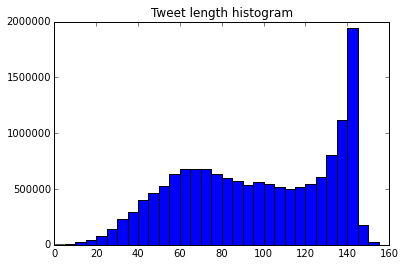

In [11]:
len_tweets = [len(t) for t in tweets]

%matplotlib inline
plt.title("Tweet length histogram")
plt.hist(len_tweets, bins=np.arange(0, 160, 5))
plt.show()

#### Print some long tweets (>140 char)

In [12]:
count = 0
for t in tweets:
    if len(t)>140:
        print "Tweet of length %d :"%len(t), t
        count += 1
    if count > 20:
        break

Tweet of length 142 : rt @mistercapone: i've always thought we were equally divided but i see now i was being naive. i really have no idea how divided we are. or…
Tweet of length 142 : rt @phillyfanlife: the world's ending just as the eagles get a franchise qb and the sixers, flyers and phils have legit cornerstone pieces.…
Tweet of length 141 : what should organisations consider if they are to prepare for cyber insurance?  november 09, 2016 at 05:00pm 
comp… https://t.co/oaaiuzapct
Tweet of length 145 : rt @lhfang: hillary team's strategy of directly &amp; implicitly (#imwithher) accusing *all* critics of sexism fueled bitter resentment on the…
Tweet of length 142 : rt @calaiii_: dear muslims, immigrants, woman, disabled, and all people of color, 
i love you- boldly and proudly. we will endure. 
we will…
Tweet of length 143 : rt @pettyblackgiri: if your political ideals include racism, misogyny, xenophobia, homophobia, transphobia, &amp; excuses for sexual predat… 
Tweet of length 142

# Convert to one-hot

In [13]:
def one_hot_char(char, accepted_characters):
    one_hot = np.zeros(len(accepted_characters)+1)
    for i, accepted_char in zip(range(len(accepted_characters)),accepted_characters):
        if char == accepted_char:
            one_hot[i] = 1
            break
    return one_hot

def one_hot_sentence(sentence, accepted_characters):
    # Char by char one-hot encoding
    one_hot = [one_hot_char(char, accepted_characters) for char in sentence]
    # Add a special char for the 'end' of the sentence : [0,0,....,0,0,1]
    special_char = np.zeros(len(accepted_characters)+1)
    special_char[-1] = 1
    one_hot += [special_char]
    # Return as a numpy array of shape (len(sentence), len(accepted_char))
    return np.array(one_hot, "uint8")

def char2label(char, accepted_characters):
    for i, accepted_char in zip(range(len(accepted_characters)),accepted_characters):
        if char == accepted_char:
            label = i
            break
    return np.array([label])

def sentence2label(sentence, accepted_characters):
    # Char by char one-hot encoding
    one_hot = [char2label(char, accepted_characters) for char in sentence]
    # Add a special char for the 'end' of the sentence : [D]
    special_char = [len(accepted_characters)]
    one_hot += [special_char]
    # Return as a numpy array of shape (len(sentence), len(accepted_char))
    return np.array(one_hot, "uint8")

def length_management(one_hot_sentence, max_len, mode="label", padding=len(ACCEPTED_CHARACTERS)+1):
    '''Padding such that each sentence contains 'max_len' timesteps.'''
    if one_hot_sentence.shape[0]>=max_len: # too long
        return one_hot_sentence[0:max_len]
    else:
        if mode == "one-hot":
            # Padding
            zero_padding = np.zeros((1,one_hot_sentence.shape[1]), "uint8")
            one_hot_sentence = np.vstack((one_hot_sentence, 
                                          zero_padding.repeat(max_len-one_hot_sentence.shape[0], axis=0)))
        else:
            padding = np.ones((max_len-one_hot_sentence.shape[0],1), "uint8")*padding
            one_hot_sentence = np.vstack((one_hot_sentence, padding))
        return one_hot_sentence

### Demo on one tweet

In [18]:
# Pick a tweet
n = np.random.randint(0,len(tweets))
tweet = tweets[n]
print tweet
# One-hot
one_hot_tweet = one_hot_sentence(tweets[0], ACCEPTED_CHARACTERS)
print "\nOne-hot encoding of size :", one_hot_tweet.shape
print one_hot_tweet
# Padding
one_hot_tweet = length_management(one_hot_tweet, 161, mode="one-hot")
print "\nAfter padding :", one_hot_tweet.shape
print one_hot_tweet

rt @kdotjohnson_: polar express the best christmas movie of all time idc https://t.co/bmpgpzo32z

One-hot encoding of size : (87L, 63L)
[[0 0 0 ..., 0 0 0]
 [0 0 0 ..., 0 0 0]
 [0 0 0 ..., 0 0 0]
 ..., 
 [0 0 1 ..., 0 0 0]
 [0 0 1 ..., 0 0 0]
 [0 0 0 ..., 0 0 1]]

After padding : (161L, 63L)
[[0 0 0 ..., 0 0 0]
 [0 0 0 ..., 0 0 0]
 [0 0 0 ..., 0 0 0]
 ..., 
 [0 0 0 ..., 0 0 0]
 [0 0 0 ..., 0 0 0]
 [0 0 0 ..., 0 0 0]]


#### But One-Hot encoding : too heavy to store... 

#### Cheaper : just keeping the index where encoding == 1

In [19]:
# Pick a tweet
n = np.random.randint(0,len(tweets))
tweet = tweets[n]
print tweet
# One-hot
one_hot_tweet = sentence2label(tweets[0], ACCEPTED_CHARACTERS)
print "\nChar2Label encoding of size :", one_hot_tweet.shape
print one_hot_tweet[0:5], "\n...\n", one_hot_tweet[-5:]
# Padding
one_hot_tweet = length_management(one_hot_tweet, 161, mode="label")
print "\nAfter padding :", one_hot_tweet.shape
print one_hot_tweet[0:5], "\n...\n", one_hot_tweet[-5:]

what in the world?! https://t.co/7iktp8joet

Char2Label encoding of size : (87L, 1L)
[[53]
 [29]
 [40]
 [40]
 [ 1]] 
...
[[ 1]
 [ 2]
 [ 2]
 [ 2]
 [62]]

After padding : (161L, 1L)
[[53]
 [29]
 [40]
 [40]
 [ 1]] 
...
[[63]
 [63]
 [63]
 [63]
 [63]]


## Encoding the whole dataset

In [41]:
T = 161
D = 1 # len(ACCEPTED_CARACTERS)+1 if one-hot
# Instanciate
dataset = np.zeros((len(tweets), T, D), "uint8")
# Fill in
for k,t in enumerate(tweets):
    # One-hot encoding
    one_hot_tweet = sentence2label(t, ACCEPTED_CHARACTERS)
    # Padding
    dataset[k] = length_management(one_hot_tweet, T)
    # Print 
    print "\rCount = %d"%(k+i),
print " tweets."

Count = 15075058  tweets.


# Save

In [44]:
np.save("data/dataset.npy", dataset)